# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
df = pd.read_csv("fraud_oracle.csv")

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
# Displaying all columns in the DataFrame
print(df.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [5]:
# Displaying summary statistics of the DataFrame
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


## Statistical Tests for the Target Variable (`FraudFound_P`)

This part of the code performs statistical tests to evaluate the relationship between selected variables and the target variable (`FraudFound_P`):

1. **Numerical Variables**: An independent t-test is used to compare the means between the fraud and non-fraud groups.
2. **Categorical Variables**: A Chi-square test is used to assess the association between the categorical variables and the target.

Based on the p-values from these tests, the code determines which variables have a statistically significant relationship with the target variable (`FraudFound_P`) (p-value < 0.05).

In [6]:
# Variables to analyze (include all variables from the DataFrame index except the target)
variables_to_test = [
    'Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
    'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
    'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
    'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
    'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
    'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
    'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
    'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'
]

# Print the length of variables to test
print(f"Number of variables to test: {len(variables_to_test)}")

# Function to perform statistical tests
def calculate_significance(df, variable):
    if df[variable].dtype in ['int64', 'float64']:
        # Numerical variables - independent t-test
        fraud_group = df[df['FraudFound_P'] == 1][variable]
        non_fraud_group = df[df['FraudFound_P'] == 0][variable]

        t_statistic, p_value = stats.ttest_ind(fraud_group, non_fraud_group)
        test_type = 't-test'

    elif df[variable].dtype == 'object':
        # Categorical variables - Chi-square test
        contingency_table = pd.crosstab(df[variable], df['FraudFound_P'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        test_type = 'Chi-square'

    else:
        return None

    return {
        'Variable': variable,
        'Test Type': test_type,
        'P-Value': p_value,
        'Significant (α=0.05)': 'Yes' if p_value < 0.05 else 'No'
    }


# Perform significance tests
results = []
for var in variables_to_test:
    if var not in df.columns:
        print(f"Variable '{var}' not found in DataFrame. Skipping...")
        continue
    result = calculate_significance(df, var)
    if result:
        results.append(result)

# Check if results are available
if results:
    # Create DataFrame for summary
    summary_df = pd.DataFrame(results)

    # Sort by p-value from highest to lowest
    summary_df_sorted = summary_df.sort_values('P-Value', ascending=False)

    # Save to CSV
    summary_df_sorted.to_csv('fraud_significance_summary1.csv', index=False)

    # Display in console
    print("Significance Levels (Highest to Lowest):")
    print(summary_df_sorted.to_string(index=False))

    # Create a more readable markdown table for reporting
    markdown_table = summary_df_sorted.to_markdown(index=False)
    print("\nMarkdown Table:\n")
    print(markdown_table)
else:
    print("No results to display. Ensure variables exist in the DataFrame.")

Number of variables to test: 32
Significance Levels (Highest to Lowest):
            Variable  Test Type      P-Value Significant (α=0.05)
       MaritalStatus Chi-square 7.979825e-01                   No
        NumberOfCars Chi-square 6.597214e-01                   No
    DayOfWeekClaimed Chi-square 6.404907e-01                   No
  WeekOfMonthClaimed     t-test 4.744015e-01                   No
      WitnessPresent Chi-square 4.389777e-01                   No
        DriverRating     t-test 3.669379e-01                   No
           RepNumber     t-test 3.484336e-01                   No
   Days_Policy_Claim Chi-square 1.807075e-01                   No
         WeekOfMonth     t-test 1.407892e-01                   No
           DayOfWeek Chi-square 1.184501e-01                   No
   PoliceReportFiled Chi-square 5.950733e-02                   No
          Deductible     t-test 3.122461e-02                  Yes
Days_Policy_Accident Chi-square 2.083813e-02                  Yes
   

### Conclusion from the Tests

The variables with a p-value **greater than 0.05** (marked as **No** in the table) are not significantly related to predicting the target variable (`FraudFound_P`). These variables include:

- `MaritalStatus`
- `NumberOfCars`
- `DayOfWeekClaimed`
- `WeekOfMonthClaimed`
- `WitnessPresent`
- `DriverRating`
- `RepNumber`
- `Days_Policy_Claim`
- `WeekOfMonth`
- `DayOfWeek`
- `PoliceReportFiled`

These variables will be further investigated individually at a later stage to understand their potential influence or lack thereof on predicting fraud.

In [7]:
# Check which variables in the DataFrame are numerical
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical variables
print("Numerical Variables:")
print(numerical_variables)

Numerical Variables:
['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']


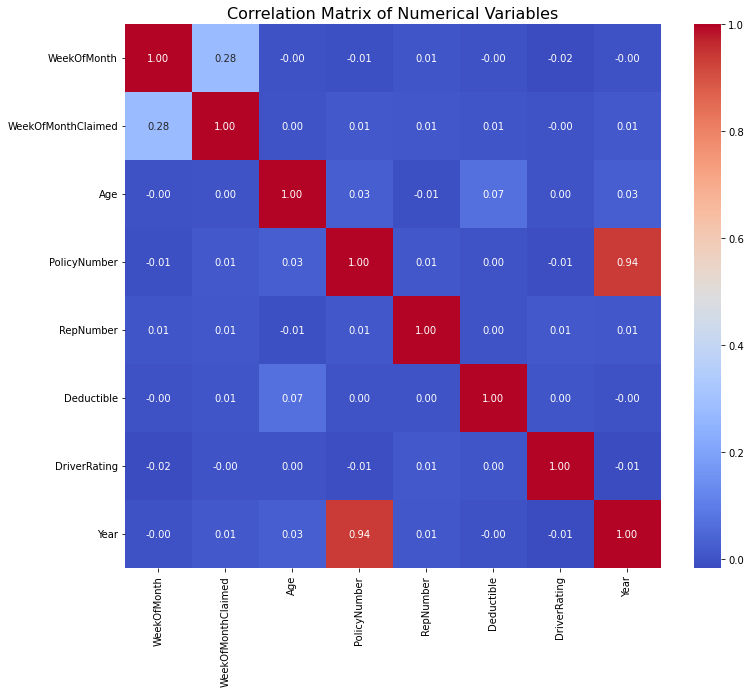

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical variables to analyze
numerical_variables = [
    'WeekOfMonth', 'WeekOfMonthClaimed', 'Age',
    'PolicyNumber', 'RepNumber', 'Deductible',
    'DriverRating', 'Year'
]

# Create a correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.show()

### Conclusion from Correlation Plot

The correlation matrix of numerical variables reveals the following key insights:

1. **High Correlation**:
   - There is a strong positive correlation between `WeekOfMonth` and `WeekOfMonthClaimed` (0.28), indicating that these two variables are somewhat related.
   - `Year` and `PolicyNumber` also exhibit a high correlation (0.94), which might indicate that the year of the policy could be related to the policy number.

2. **Low Correlation**:
   - Most of the other variables, such as `Age`, `Deductible`, and `DriverRating`, show very low correlations with one another, indicating that they do not share a significant linear relationship.

3. **Negative Correlations**:
   - The correlations are mostly positive, with very few negative correlations, suggesting that the relationships between the variables are largely positive or minimal.

In summary, the most notable correlation is  between `Year` and `PolicyNumber`, which may indicate redundancy or closely related features that should be further examined.

## Assess Each of the Features
### Variables Failing Statistical Tests

The following variables failed their respective statistical tests:
- **Categorical variables**: Failed the Chi-square test (no significant association with `FraudFound_P`).
- **Numerical variables**: Failed the t-test (no significant mean difference between target classes).

Despite this, visualizations are used to explore potential patterns or insights that may justify their inclusion in further analysis.

In [9]:
# Define the custom color palette based on your navy color scheme
custom_palette = {
    0: '#CCD5DC',  # Navy - 20% for FraudFound_P = 0
    1: '#002B51'   # Navy for FraudFound_P = 1
}

### Variable: MaritalStatus  
**Decision:** Keep.  

The class distribution shows significant differences in the number of fraud cases across categories. Some classes, like "Widow," have noticeably higher fraud ratios compared to others. This indicates that "MaritalStatus" is an important categorical variable.

Plotting MaritalStatus over FraudFound_P


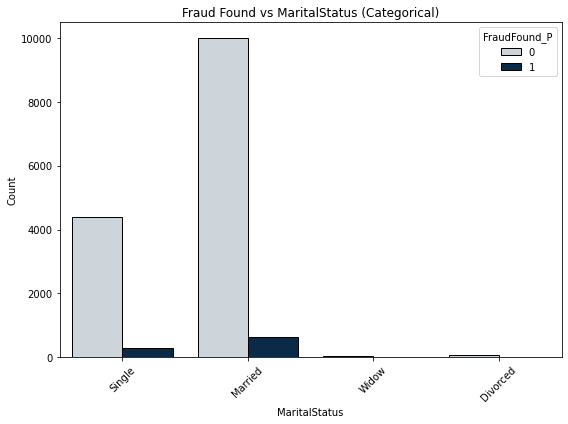


Class Distribution for MaritalStatus:
FraudFound_P      0    1
MaritalStatus           
Divorced         73    3
Married        9986  639
Single         4406  278
Widow            32    3

Fraud Ratio for MaritalStatus:
MaritalStatus
Divorced    0.039474
Married     0.060141
Single      0.059351
Widow       0.085714
Name: FraudFound_P, dtype: float64


In [10]:
# Plot for MaritalStatus
print("Plotting MaritalStatus over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs MaritalStatus (Categorical)")
plt.xlabel("MaritalStatus")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for MaritalStatus
class_distribution = df.groupby('MaritalStatus')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('MaritalStatus')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for MaritalStatus:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for MaritalStatus:")
print(fraud_ratio)

### Variable: NumberOfCars  
**Decision:** Keep.  

The class distribution reveals significant differences in the number of fraud cases across categories. While most fraud cases are concentrated in the "1 vehicle" category, classes like "3 to 4" have a noticeably higher fraud ratio. This suggests that "NumberOfCars" is an important categorical variable for predicting fraud.

Plotting NumberOfCars over FraudFound_P


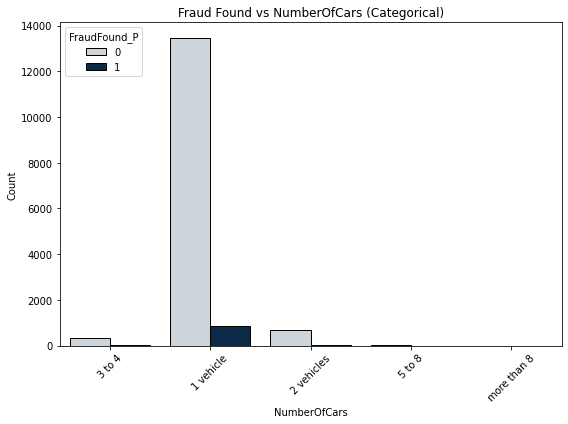


Class Distribution for NumberOfCars:
FraudFound_P        0      1
NumberOfCars                
1 vehicle     13466.0  850.0
2 vehicles      666.0   43.0
3 to 4          343.0   29.0
5 to 8           20.0    1.0
more than 8       2.0    0.0

Fraud Ratio for NumberOfCars:
NumberOfCars
1 vehicle      0.059374
2 vehicles     0.060649
3 to 4         0.077957
5 to 8         0.047619
more than 8    0.000000
Name: FraudFound_P, dtype: float64


In [11]:
# Plot for NumberOfCars
print("Plotting NumberOfCars over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='NumberOfCars', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs NumberOfCars (Categorical)")
plt.xlabel("NumberOfCars")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for NumberOfCars
class_distribution = df.groupby('NumberOfCars')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('NumberOfCars')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for NumberOfCars:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for NumberOfCars:")
print(fraud_ratio)

### Decision for Variable: **DayOfWeekClaimed**

**Decision:** Keep.

The class distribution indicates that fraud cases are present across various days, with "Saturday" having a notably higher fraud ratio (0.078740) compared to other days. This variability in fraud ratios across the days of the week suggests that `DayOfWeekClaimed` is an important categorical variable worth retaining in the model.

Plotting DayOfWeekClaimed over FraudFound_P


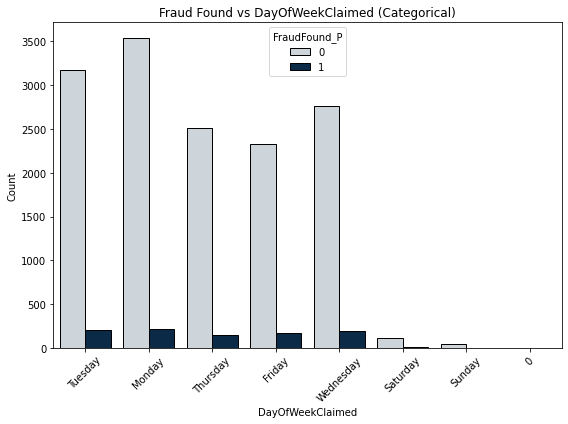


Class Distribution for DayOfWeekClaimed:
FraudFound_P           0      1
DayOfWeekClaimed               
0                    1.0    0.0
Friday            2333.0  164.0
Monday            3541.0  216.0
Saturday           117.0   10.0
Sunday              49.0    3.0
Thursday          2516.0  144.0
Tuesday           3177.0  198.0
Wednesday         2763.0  188.0

Fraud Ratio for DayOfWeekClaimed:
DayOfWeekClaimed
0            0.000000
Friday       0.065679
Monday       0.057493
Saturday     0.078740
Sunday       0.057692
Thursday     0.054135
Tuesday      0.058667
Wednesday    0.063707
Name: FraudFound_P, dtype: float64


In [12]:
# Plot for DayOfWeekClaimed
print("Plotting DayOfWeekClaimed over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='DayOfWeekClaimed', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs DayOfWeekClaimed (Categorical)")
plt.xlabel("DayOfWeekClaimed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for DayOfWeekClaimed
class_distribution = df.groupby('DayOfWeekClaimed')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('DayOfWeekClaimed')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for DayOfWeekClaimed:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for DayOfWeekClaimed:")
print(fraud_ratio)

### Variable: WeekOfMonthClaimed
**Decision:** Keep.

The class distribution shows significant differences in the number of fraud cases across weeks. While the fraud ratios are relatively consistent, there are slight variations, with Week 1 having the highest fraud ratio (6.38%) and Week 5 having the lowest (5.27%). These differences suggest that `WeekOfMonthClaimed` might hold valuable information for predicting fraud. Thus, it is an important variable to retain.

Plotting WeekOfMonthClaimed over FraudFound_P


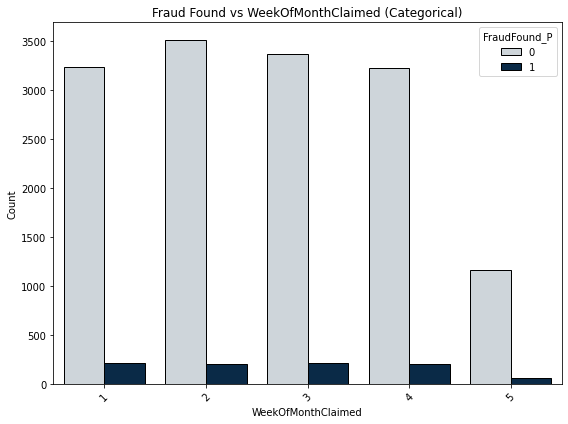


Class Distribution for WeekOfMonthClaimed:
FraudFound_P           0    1
WeekOfMonthClaimed           
1                   3230  220
2                   3512  208
3                   3362  221
4                   3224  209
5                   1169   65

Fraud Ratio for WeekOfMonthClaimed:
WeekOfMonthClaimed
1    0.063768
2    0.055914
3    0.061680
4    0.060880
5    0.052674
Name: FraudFound_P, dtype: float64


In [13]:
# Plot for WeekOfMonthClaimed
print("Plotting WeekOfMonthClaimed over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='WeekOfMonthClaimed', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs WeekOfMonthClaimed (Categorical)")
plt.xlabel("WeekOfMonthClaimed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for WeekOfMonthClaimed
class_distribution = df.groupby('WeekOfMonthClaimed')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('WeekOfMonthClaimed')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for WeekOfMonthClaimed:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for WeekOfMonthClaimed:")
print(fraud_ratio)

### Variable: WitnessPresent  
**Decision:** Keep.  

The class distribution shows that cases with "No" witnesses dominate, but cases with "Yes" witnesses have a significantly lower fraud ratio (3.4%) compared to "No" (6.0%). This indicates that the presence of a witness might carry potential importance in reducing fraud likelihood. Therefore, `WitnessPresent` should be retained for further analysis.

Plotting WitnessPresent over FraudFound_P


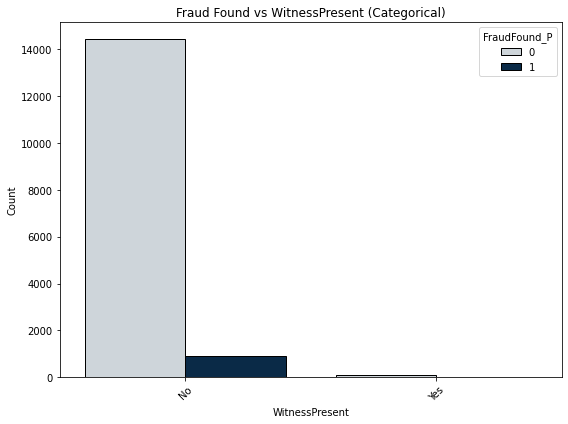


Class Distribution for WitnessPresent:
FraudFound_P        0    1
WitnessPresent            
No              14413  920
Yes                84    3

Fraud Ratio for WitnessPresent:
WitnessPresent
No     0.060001
Yes    0.034483
Name: FraudFound_P, dtype: float64


In [14]:
# Plot for WitnessPresent
print("Plotting WitnessPresent over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='WitnessPresent', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs WitnessPresent (Categorical)")
plt.xlabel("WitnessPresent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for WitnessPresent
class_distribution = df.groupby('WitnessPresent')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('WitnessPresent')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for WitnessPresent:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for WitnessPresent:")
print(fraud_ratio)

### Variable: DriverRating  
**Decision:** Keep.  

The descriptive statistics for `DriverRating` indicate that fraud cases (`FraudFound_P = 1`) have a slightly higher mean rating (2.52) compared to non-fraud cases (`FraudFound_P = 0`, mean = 2.49). While the difference is small, the spread and quartile values suggest a potential relationship between `DriverRating` and fraud likelihood. Given the variability and possible importance, this variable should be retained for further analysis.

Plotting DriverRating over FraudFound_P


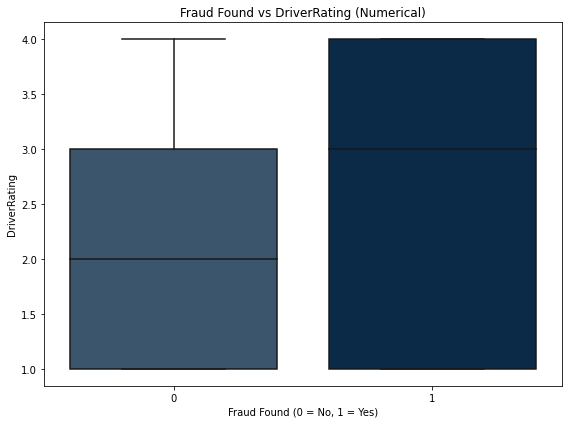


Descriptive Statistics for DriverRating by FraudFound_P:
                count      mean       std  min  25%  50%  75%  max
FraudFound_P                                                      
0             14497.0  2.485756  1.119184  1.0  1.0  2.0  3.0  4.0
1               923.0  2.520043  1.123781  1.0  1.0  3.0  4.0  4.0


In [15]:
# Plot for DriverRating
print("Plotting DriverRating over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudFound_P', y='DriverRating', data=df, palette=['#335574', '#002B51'], showfliers=False)
plt.title("Fraud Found vs DriverRating (Numerical)")
plt.xlabel("Fraud Found (0 = No, 1 = Yes)")
plt.ylabel("DriverRating")
plt.tight_layout()
plt.show()

# Perform descriptive analysis for DriverRating grouped by FraudFound_P
descriptive_stats = df.groupby('FraudFound_P')['DriverRating'].describe()

# Display descriptive statistics
print("\nDescriptive Statistics for DriverRating by FraudFound_P:")
print(descriptive_stats)

### Variable: RepNumber  
**Decision:** Drop.  

The descriptive statistics for `RepNumber` reveal negligible differences between fraud cases (`FraudFound_P = 1`, mean = 8.35) and non-fraud cases (`FraudFound_P = 0`, mean = 8.49). The similar spread and quartile values indicate that `RepNumber` does not provide significant discriminatory power for fraud detection. As the variable adds little value to the analysis, it should be excluded.

Plotting RepNumber over FraudFound_P


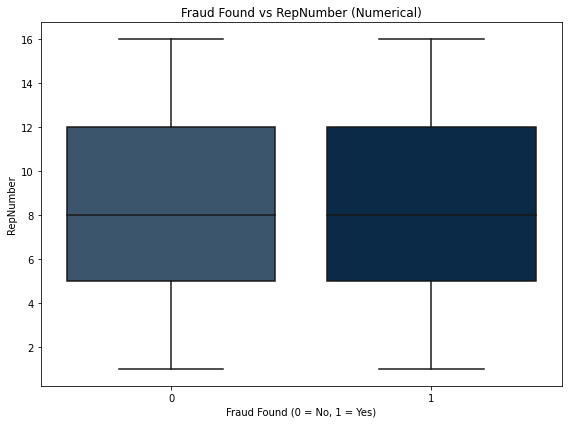


Descriptive Statistics for RepNumber by FraudFound_P:
                count      mean       std  min  25%  50%   75%   max
FraudFound_P                                                        
0             14497.0  8.492033  4.604212  1.0  5.0  8.0  12.0  16.0
1               923.0  8.345612  4.532690  1.0  5.0  8.0  12.0  16.0


In [16]:
# Plot for RepNumber
print("Plotting RepNumber over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudFound_P', y='RepNumber', data=df, palette=['#335574', '#002B51'], showfliers=False)
plt.title("Fraud Found vs RepNumber (Numerical)")
plt.xlabel("Fraud Found (0 = No, 1 = Yes)")
plt.ylabel("RepNumber")
plt.tight_layout()
plt.show()
# Perform descriptive analysis for RepNumber grouped by FraudFound_P
descriptive_stats_rep = df.groupby('FraudFound_P')['RepNumber'].describe()

# Display descriptive statistics
print("\nDescriptive Statistics for RepNumber by FraudFound_P:")
print(descriptive_stats_rep)

### Variable: Days_Policy_Claim
**Decision:** Keep.  

**Rationale:**
1. **Distinct Fraud Patterns Across Categories:** The fraud count and non-fraud count vary significantly across the `Days_Policy_Claim` categories. Categories such as "8 to 15" and "15 to 30" have higher fraud counts relative to others.
2. **Potential Predictive Value:** The varying counts suggest that `Days_Policy_Claim` could carry important information for distinguishing between fraud and non-fraud cases.
3. **Fraud Ratio Differences:** The fraud ratios among categories show meaningful variation, with some categories indicating elevated risk. For example, "8 to 15" has a noticeably higher fraud ratio than others.

Given these factors, retaining `Days_Policy_Claim` as a variable is important for further analysis and modeling.

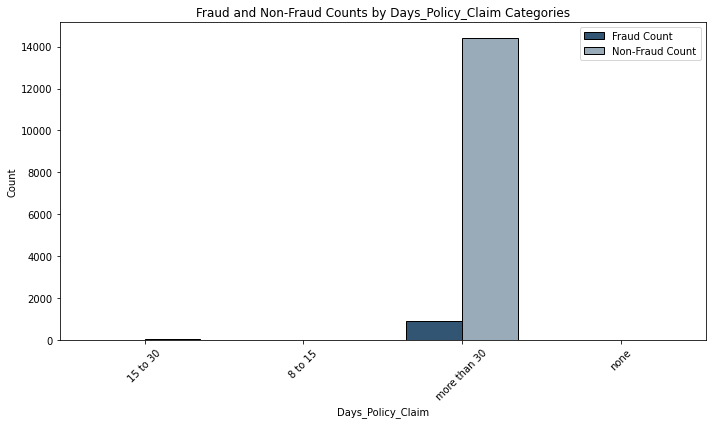


Class Distribution for WitnessPresent:
FraudFound_P        0    1
WitnessPresent            
No              14413  920
Yes                84    3

Fraud Ratio for WitnessPresent:
WitnessPresent
No     0.060001
Yes    0.034483
Name: FraudFound_P, dtype: float64


In [17]:
# Prepare counts for Days_Policy_Claim
fraud_count = df[df['FraudFound_P'] == 1].groupby('Days_Policy_Claim').size()  # Count of fraud cases
non_fraud_count = df[df['FraudFound_P'] == 0].groupby('Days_Policy_Claim').size()  # Count of non-fraud cases

# Align the indices for Days_Policy_Claim categories
categories = df['Days_Policy_Claim'].unique()
categories = [str(cat) for cat in sorted(categories)]
fraud_count = fraud_count.reindex(categories, fill_value=0)
non_fraud_count = non_fraud_count.reindex(categories, fill_value=0)

# Grouped bar plot for Days_Policy_Claim
x = np.arange(len(categories))  # Position of categories
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, fraud_count, width, label='Fraud Count', color='#335574', edgecolor='black')
plt.bar(x + width / 2, non_fraud_count, width, label='Non-Fraud Count', color='#99AAB9', edgecolor='black')

# Add labels, title, and legend for Days_Policy_Claim
plt.xlabel("Days_Policy_Claim")
plt.ylabel("Count")
plt.title("Fraud and Non-Fraud Counts by Days_Policy_Claim Categories")
plt.xticks(x, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Compute and display class distribution and fraud ratio for WitnessPresent
class_distribution = df.groupby('WitnessPresent')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('WitnessPresent')['FraudFound_P'].mean()

print("\nClass Distribution for WitnessPresent:")
print(class_distribution)

print("\nFraud Ratio for WitnessPresent:")
print(fraud_ratio)

### Variable: WeekOfMonth  
**Decision:** Keep.  

The class distribution shows noticeable variation in fraud counts across different weeks of the month, with Weeks 1 and 2 having slightly higher fraud ratios (6.28% and 6.32%, respectively) compared to Weeks 4 and 5 (5.65% and 5.56%). Although the differences are not dramatic, the consistency in slightly elevated ratios for earlier weeks indicates that `WeekOfMonth` may provide valuable insights for fraud detection. Thus, this variable should be retained for further analysis.

Plotting WeekOfMonth over FraudFound_P


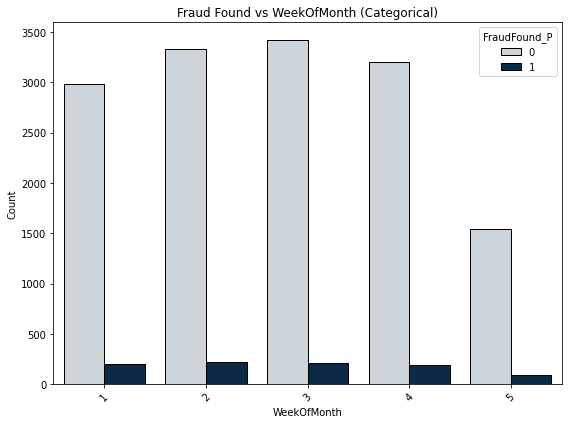


Class Distribution for WeekOfMonth:
FraudFound_P     0    1
WeekOfMonth            
1             2987  200
2             3333  225
3             3425  215
4             3206  192
5             1546   91

Fraud Ratio for WeekOfMonth:
WeekOfMonth
1    0.062755
2    0.063238
3    0.059066
4    0.056504
5    0.055589
Name: FraudFound_P, dtype: float64


In [18]:
# Plot for WeekOfMonth
print("Plotting WeekOfMonth over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='WeekOfMonth', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs WeekOfMonth (Categorical)")
plt.xlabel("WeekOfMonth")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for WeekOfMonth
class_distribution = df.groupby('WeekOfMonth')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('WeekOfMonth')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for WeekOfMonth:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for WeekOfMonth:")
print(fraud_ratio)

### Variable: DayOfWeek  
**Decision:** Keep.  

The class distribution shows that fraud cases (`FraudFound_P = 1`) vary across days, with higher counts on specific days like `Friday`, `Monday`, and `Saturday`. Furthermore, the fraud ratios for days such as `Saturday` (6.66%) and `Sunday` (6.99%) are noticeably higher compared to others, indicating a potential relationship between `DayOfWeek` and fraud likelihood. Given these observations, this variable holds predictive significance and should be retained for further analysis.

Plotting DayOfWeek over FraudFound_P


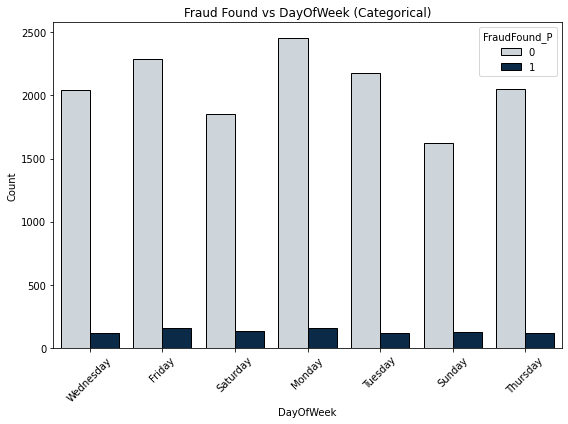


Class Distribution for DayOfWeek:
FraudFound_P     0    1
DayOfWeek              
Friday        2291  154
Monday        2456  160
Saturday      1850  132
Sunday        1623  122
Thursday      2053  120
Tuesday       2180  120
Wednesday     2044  115

Fraud Ratio for DayOfWeek:
DayOfWeek
Friday       0.062986
Monday       0.061162
Saturday     0.066599
Sunday       0.069914
Thursday     0.055223
Tuesday      0.052174
Wednesday    0.053265
Name: FraudFound_P, dtype: float64


In [19]:
# Plot for DayOfWeek
print("Plotting DayOfWeek over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='DayOfWeek', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs DayOfWeek (Categorical)")
plt.xlabel("DayOfWeek")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for DayOfWeek
class_distribution = df.groupby('DayOfWeek')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('DayOfWeek')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for DayOfWeek:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for DayOfWeek:")
print(fraud_ratio)

### Variable: PoliceReportFiled  
**Decision:** Keep.  

The class distribution shows that the majority of cases fall under "No," with relatively few cases in the "Yes" category. However, the fraud ratio for "Yes" (3.74%) is noticeably lower compared to "No" (6.05%), indicating that filing a police report might correlate with a reduced likelihood of fraud. This potential relationship suggests that `PoliceReportFiled` could provide valuable predictive insights and should be retained for further analysis.

Plotting PoliceReportFiled over FraudFound_P


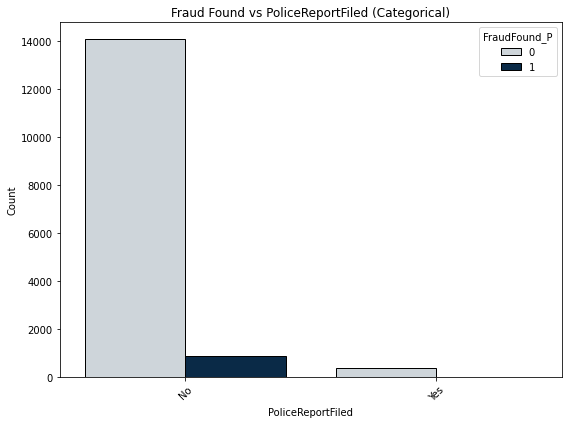


Class Distribution for PoliceReportFiled:
FraudFound_P           0    1
PoliceReportFiled            
No                 14085  907
Yes                  412   16

Fraud Ratio for PoliceReportFiled:
PoliceReportFiled
No     0.060499
Yes    0.037383
Name: FraudFound_P, dtype: float64


In [20]:
# Plot for PoliceReportFiled
print("Plotting PoliceReportFiled over FraudFound_P")
plt.figure(figsize=(8, 6))
sns.countplot(x='PoliceReportFiled', hue='FraudFound_P', data=df, palette=custom_palette, edgecolor='black')
plt.title("Fraud Found vs PoliceReportFiled (Categorical)")
plt.xlabel("PoliceReportFiled")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate class distribution and fraud ratio for PoliceReportFiled
class_distribution = df.groupby('PoliceReportFiled')['FraudFound_P'].value_counts(normalize=False).unstack().fillna(0)
fraud_ratio = df.groupby('PoliceReportFiled')['FraudFound_P'].mean()

# Display class distribution
print("\nClass Distribution for PoliceReportFiled:")
print(class_distribution)

# Display fraud ratio
print("\nFraud Ratio for PoliceReportFiled:")
print(fraud_ratio)

## Conclusion of the EDA for Feature Engineering

After conducting the exploratory data analysis (EDA), we conclude that most of the features are relevant and contribute to explaining the target variable (`FraudFound_P`). However, two features will be removed based on the following insights:

1. **RepNumber**: This numerical variable exhibits very similar patterns across different target values (fraud vs. non-fraud). It does not provide significant discrimination for the prediction task, thus will be removed.

2. **PolicyNumber**: This feature has a high correlation with `Year`, suggesting that it may be influenced by the year and may not add independent value to the model. Additionally, `PolicyNumber` is likely generated randomly based on the policy and does not have direct relevance to the fraud detection task based on contextual understanding.

These features will be removed to improve model performance and prevent redundancy in the dataset.

# Data Pre-Processing


In [21]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, recall_score, precision_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

In [22]:
import numpy as np
import tensorflow as tf
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# If using scikit-learn models
from sklearn.utils import check_random_state
check_random_state(42)


RandomState(MT19937) at 0x297239E40

In [23]:
# set pd to display full output
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [24]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [26]:
#check missing value
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [27]:
#check for unique values in each column
for column in df:
    if column != 'PolicyNumber':
        print(column)
        print(sorted(df[column].unique()), "\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

In [28]:
# we observe that certain values do not make sense
# 1. df["DayOfWeekClaimed"] == 0
# 2. df["MonthClaimed"] == 0
# 3. df["Age"] == 0

# check point 1 & 2
df[df['DayOfWeekClaimed']=='0']
df[df['MonthClaimed']=='0']
# only one row with point 1 & 2, drop it.
df = df[~(df['MonthClaimed']=='0')]

# check point 3
df[df['Age']==0]
# Since "AgeOfPolicyHolder" is all "16 to 17" for these rows, i set the Age to 16.5
df['Age'] =df['Age'].replace({0:16.5})

In [29]:
# check distribution of target
fraud_counts = df['FraudFound_P'].value_counts()
print(fraud_counts)

0    14496
1      923
Name: FraudFound_P, dtype: int64


## Pre-Processing Steps

In [30]:
# Step 1: Drop multiple columns - based on EDA
df = df.drop(columns=['PolicyNumber', 'RepNumber'])

In [31]:
# Step 2: Encoding
# One-hot encoding
one_hot_cols = [
    'Sex', 'MaritalStatus', 'AccidentArea', 'BasePolicy',
    'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'VehicleCategory',
    'Fault'
]
df = pd.get_dummies(df, columns= one_hot_cols, drop_first=True)

# Label encoding
# Label encode high-cardinality categorical variables
high_cardinality_cols = [
    'Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
    'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed',
    'PolicyType'
]
label_enc = LabelEncoder()
for col in high_cardinality_cols:
    df[col] = label_enc.fit_transform(df[col])


# Ordinal encoding for ordinal categorical variables
categorical_mappings = {
    'AddressChange_Claim': {
        'under 6 months': 1, '1 year': 2, '2 to 3 years': 3,
        '4 to 8 years': 4, 'no change': 0
    },
    'NumberOfCars': {
        '1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3,
        '5 to 8': 4, 'more than 8': 5
    },
    'VehiclePrice': {
        'less than 20000': 1, '20000 to 29000': 2, '30000 to 39000': 3,
        '40000 to 59000': 4, '60000 to 69000': 5, 'more than 69000': 6
    },
    'Days_Policy_Accident': {
        'none': 0, '1 to 7' :1, '8 to 15':2, '15 to 30':3, 'more than 30':4
    },
    'Days_Policy_Claim': {
         '8 to 15':1,'15 to 30':2, 'more than 30': 3, 'none':0
    },
    'PastNumberOfClaims': {
        'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3
    },
    'AgeOfVehicle': {
        'new': 0, '2 years': 2, '3 years': 3, '4 years': 4,
        '5 years': 5, '6 years': 6, '7 years': 7, 'more than 7': 8
    },
    'AgeOfPolicyHolder': {
        '16 to 17': 1, '18 to 20': 2, '21 to 25': 3, '26 to 30': 4,
        '31 to 35': 5, '36 to 40': 6, '41 to 50': 7, '51 to 65': 8,
        'over 65': 9
    },
    'NumberOfSuppliments': {
    'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3
    },
     'Year': {
        1994: 1, 1995: 2, 1996: 3
    },
    'Deductible': {
        300: 1, 400: 2, 500: 3, 700: 4
    }

}

# Apply mappings to the respective columns
for col, mapping in categorical_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

df = df.astype("int")

In [32]:
# Step 3: standard scaling

scale_cols = ["Age"]
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [33]:
df.isnull().sum()


Month                      0
WeekOfMonth                0
DayOfWeek                  0
Make                       0
DayOfWeekClaimed           0
MonthClaimed               0
WeekOfMonthClaimed         0
Age                        0
PolicyType                 0
VehiclePrice               0
FraudFound_P               0
Deductible                 0
DriverRating               0
Days_Policy_Accident       0
Days_Policy_Claim          0
PastNumberOfClaims         0
AgeOfVehicle               0
AgeOfPolicyHolder          0
NumberOfSuppliments        0
AddressChange_Claim        0
NumberOfCars               0
Year                       0
Sex_Male                   0
MaritalStatus_Married      0
MaritalStatus_Single       0
MaritalStatus_Widow        0
AccidentArea_Urban         0
BasePolicy_Collision       0
BasePolicy_Liability       0
PoliceReportFiled_Yes      0
WitnessPresent_Yes         0
AgentType_Internal         0
VehicleCategory_Sport      0
VehicleCategory_Utility    0
Fault_Third Pa

In [34]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,PolicyType,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,AccidentArea_Urban,BasePolicy_Collision,BasePolicy_Liability,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,VehicleCategory_Sport,VehicleCategory_Utility,Fault_Third Party
0,2,4,6,6,5,4,0,-1.513552,5,6,0,1,1,4,3,0,3,4,0,2,3,1,0,0,1,0,1,0,1,0,0,0,1,0,0
1,4,2,6,6,1,4,3,-0.488180,4,6,0,2,4,4,3,0,6,5,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0
2,10,4,0,6,4,9,1,0.537191,4,6,0,2,3,4,3,1,7,7,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0
3,6,1,2,17,0,5,0,1.956936,2,2,0,2,2,4,3,1,8,8,3,0,1,1,1,1,0,0,0,0,1,1,0,0,1,0,1
4,4,4,1,6,5,3,1,-1.040303,4,6,0,2,1,4,3,0,5,5,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1


## Split Data

In [35]:
# Split into features and target
X = df.drop('FraudFound_P', axis=1)  # Features
y = df['FraudFound_P']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class Distribution:
 0    11611
1      724
Name: FraudFound_P, dtype: int64


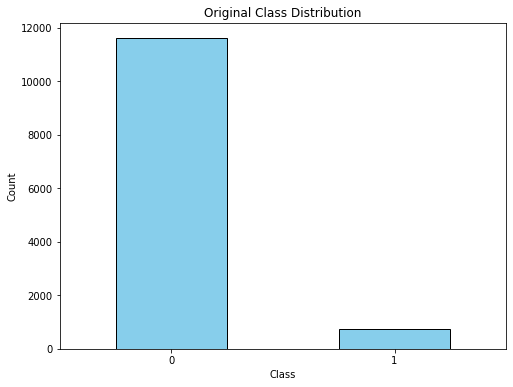

In [36]:
import matplotlib.pyplot as plt
# Original distribution before re-sampling
fraud_counts = y_train.value_counts()

# Displaying the class distribution
print("Class Distribution:\n", fraud_counts)
# Plotting the class distribution
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## SMOTE Over Sampling
  - Upsampled the minority class (`1`) by generating synthetic samples.
  - Increased the minority class size to 1.5 times its original size, leaving the majority class unchanged.

We employ oversampling by increasing the number of minority cases until they reach half of the majority cases, which allows us to address class imbalance effectively without overwhelming the model with synthetic data. This method enhances the model's ability to learn from underrepresented cases while maintaining diversity in the dataset, ultimately leading to more balanced decision-making.


### Over Sampling Implementation

Class Distribution After SMOTE Oversampling:
 0    11611
1     5805
Name: FraudFound_P, dtype: int64

Class Distribution (Percentage):
 0    66.668581
1    33.331419
Name: FraudFound_P, dtype: float64


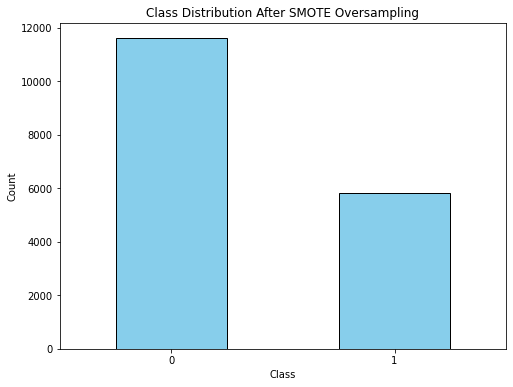

In [37]:
# Assuming X_train and y_train are defined
oversample = SMOTE(sampling_strategy=0.5)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Get the value counts for the target variable after oversampling
y_train_over_counts = y_train_over.value_counts()
# Display the class distribution
print("Class Distribution After SMOTE Oversampling:\n", y_train_over_counts)
print("\nClass Distribution (Percentage):\n", (y_train_over_counts / y_train_over_counts.sum()) * 100)


# Plot the class distribution
plt.figure(figsize=(8, 6))
y_train_over_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution After SMOTE Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Model Testing for Oversampling Technique

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2885
           1       0.22      0.13      0.16       199

    accuracy                           0.92      3084
   macro avg       0.58      0.55      0.56      3084
weighted avg       0.89      0.92      0.90      3084

Confusion Matrix:
[[2797   88]
 [ 174   25]]


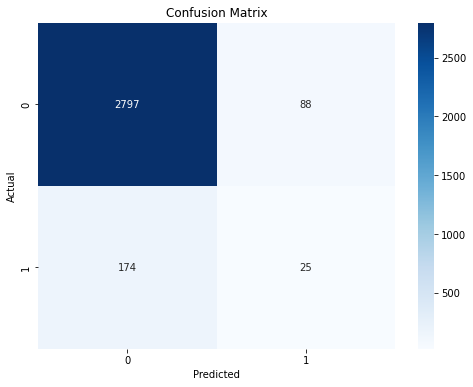

Accuracy Score:
0.9150453955901426
Recall Score:
0.12562814070351758


In [38]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_over, y_train_over)

# Step 3: Make predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("Recall Score:")
print(recall_score(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5805, number of negative: 11611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 17416, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333314 -> initscore=-0.693233
[LightGBM] [Info] Start training from score -0.693233
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2885
           1       0.24      0.26      0.25       199

    accuracy                           0.90      3084
   macro avg       0.59      0.60      0.60      3084
weighted avg       0.90      0.90      0.90      3084

Confusion Matr

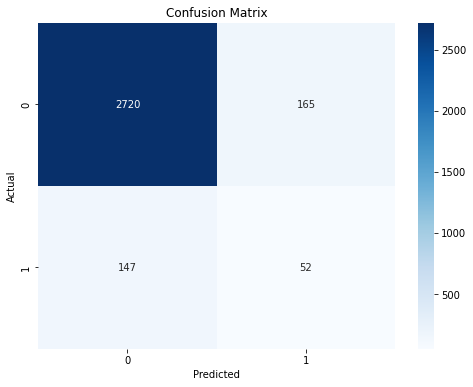

Accuracy Score:
0.8988326848249028
Recall Score:
0.2613065326633166


In [39]:
# Step 1: Initialize and Train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, is_unbalance=True)
lgb_model.fit(X_train_over, y_train_over)

# Step 2: Make predictions
y_pred = lgb_model.predict(X_test)

# Step 3: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("Recall Score:")
print(recall_score(y_test, y_pred))

# Traditional Models
These models offer straightforward algorithms for handling the structured data in our dataset:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Naive Bayes
- Decision Tree

## Model Evaluation

In [40]:
# import packages
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

In [41]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Train and evaluate a machine learning model

    Parameters:
    - model: The machine learning model to train
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - model_name: Name of the model for printing

    Returns:
    - Dictionary with evaluation metrics
    """
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print results
    print(f"\nModel Evaluation - {model_name}")
    print("=" * 40)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

    print(f"\nAccuracy Score: {accuracy}")
    print(f"Recall Score: {recall}")
    print(f"Precision Score: {precision}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")

    return {
        'model': model_name,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'roc_auc_score': roc_auc
    }

In [42]:
def run_classifiers(X_train_over, y_train_over, X_test, y_test):
    """
    Run multiple classifiers on oversampled training data

    Parameters:
    - X_train_over, y_train_over: Oversampled training data
    - X_test, y_test: Test data

    Returns:
    - List of evaluation results
    """
    # Initialize models
    models = [
        (LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression"),
        (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
        (SVC(random_state=42), "Support Vector Machine"),
        (GaussianNB(), "Naive Bayes"),
        (DecisionTreeClassifier(random_state=42), "Decision Tree")
    ]

    # Results storage
    all_results = []

    # Run each model
    for model, model_name in models:
        result = evaluate_model(
            model,
            X_train_over, y_train_over,
            X_test, y_test,
            model_name
        )
        all_results.append(result)

    return all_results


Model Evaluation - Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2885
           1       0.19      0.29      0.23       199

    accuracy                           0.87      3084
   macro avg       0.57      0.60      0.58      3084
weighted avg       0.90      0.87      0.89      3084


Confusion Matrix:
[[2632  253]
 [ 141   58]]


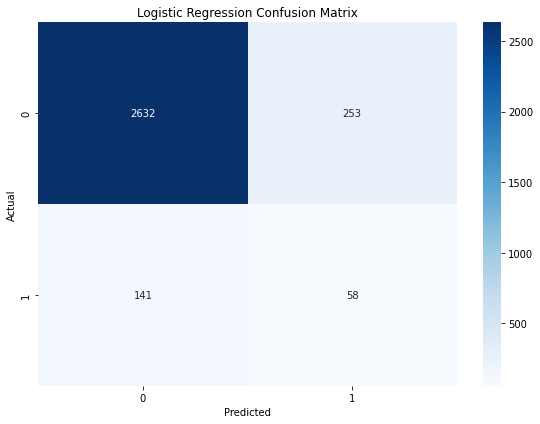


Accuracy Score: 0.8722438391699092
Recall Score: 0.2914572864321608
Precision Score: 0.1864951768488746
F1 Score: 0.22745098039215686
ROC AUC Score: 0.6018811562143472

Model Evaluation - K-Nearest Neighbors

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2885
           1       0.10      0.27      0.14       199

    accuracy                           0.79      3084
   macro avg       0.52      0.55      0.51      3084
weighted avg       0.89      0.79      0.84      3084


Confusion Matrix:
[[2396  489]
 [ 146   53]]


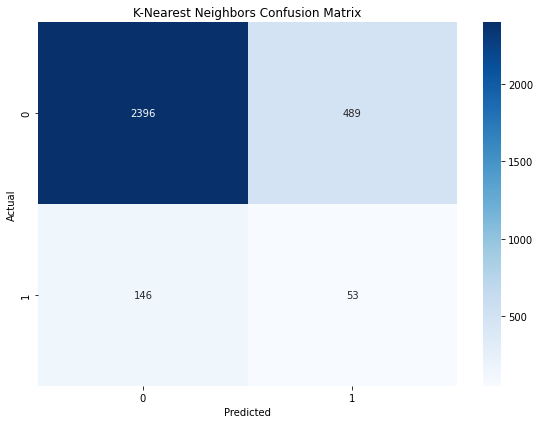


Accuracy Score: 0.7940985732814526
Recall Score: 0.2663316582914573
Precision Score: 0.09778597785977859
F1 Score: 0.14304993252361672
ROC AUC Score: 0.5484171289724183

Model Evaluation - Support Vector Machine

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2885
           1       0.20      0.24      0.21       199

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.58      3084
weighted avg       0.90      0.89      0.89      3084


Confusion Matrix:
[[2691  194]
 [ 152   47]]


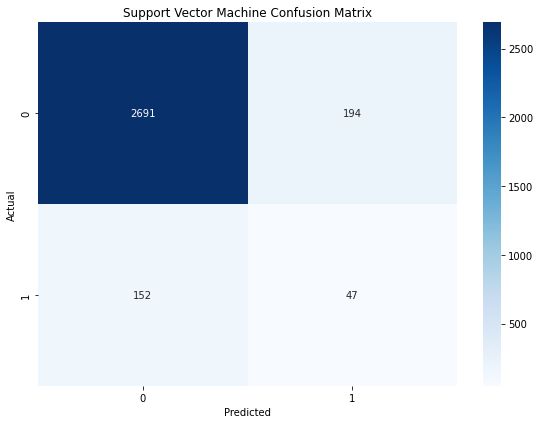


Accuracy Score: 0.8878080415045395
Recall Score: 0.23618090452261306
Precision Score: 0.1950207468879668
F1 Score: 0.21363636363636362
ROC AUC Score: 0.5844682685524677

Model Evaluation - Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.78      2885
           1       0.13      0.80      0.23       199

    accuracy                           0.65      3084
   macro avg       0.56      0.72      0.50      3084
weighted avg       0.92      0.65      0.74      3084


Confusion Matrix:
[[1854 1031]
 [  40  159]]


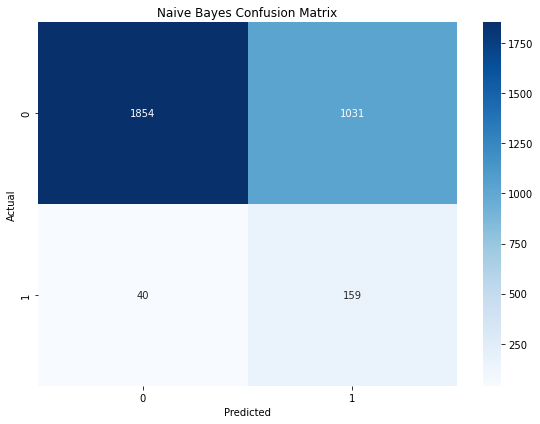


Accuracy Score: 0.6527237354085603
Recall Score: 0.7989949748743719
Precision Score: 0.13361344537815126
F1 Score: 0.22894168466522677
ROC AUC Score: 0.720814645149491

Model Evaluation - Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2885
           1       0.17      0.26      0.21       199

    accuracy                           0.87      3084
   macro avg       0.56      0.59      0.57      3084
weighted avg       0.90      0.87      0.88      3084


Confusion Matrix:
[[2639  246]
 [ 147   52]]


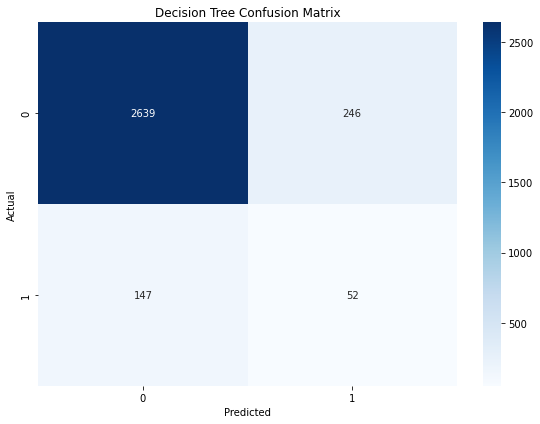


Accuracy Score: 0.872568093385214
Recall Score: 0.2613065326633166
Precision Score: 0.174496644295302
F1 Score: 0.20925553319919518
ROC AUC Score: 0.5880189509070483

Results Summary:
                    model  accuracy    recall  precision  f1_score  \
0     Logistic Regression  0.872244  0.291457   0.186495  0.227451   
1     K-Nearest Neighbors  0.794099  0.266332   0.097786  0.143050   
2  Support Vector Machine  0.887808  0.236181   0.195021  0.213636   
3             Naive Bayes  0.652724  0.798995   0.133613  0.228942   
4           Decision Tree  0.872568  0.261307   0.174497  0.209256   

   roc_auc_score  
0       0.601881  
1       0.548417  
2       0.584468  
3       0.720815  
4       0.588019  


In [43]:
# model running
def main():
    """
    Main function to run the model evaluation pipeline
    """

    # Run classifiers
    results = run_classifiers(
        X_train_over, y_train_over,
        X_test, y_test
    )

    # Create a summary DataFrame of results
    results_df = pd.DataFrame(results)
    print("\nResults Summary:")
    print(results_df)

if __name__ == "__main__":
    main()

**Traditional Results Summary:**

| Model                  | Accuracy | Recall  | Precision | F1 Score | ROC AUC Score |
|------------------------|----------|---------|-----------|----------|---------------|
| Logistic Regression    | 0.8722   | 0.2915  | 0.1865    | 0.2275   | 0.6019        |
| K-Nearest Neighbors    | 0.7941   | 0.2663  | 0.0978    | 0.1431   | 0.5484        |
| Support Vector Machine | 0.8878   | 0.2362  | 0.1950    | 0.2136   | 0.5845        |
| Naive Bayes            | 0.6527   | 0.7990  | 0.1336    | 0.2289   | 0.7208        |
| Decision Tree          | 0.8726   | 0.2613  | 0.1745    | 0.2093   | 0.5880        |


In [44]:
import pandas as pd

# Creating a DataFrame with the provided data
data = {
    'model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree'],
    'accuracy': [0.872244, 0.794099, 0.887808, 0.652724, 0.872568],
    'recall': [0.291457, 0.266332, 0.236181, 0.798995, 0.261307],
    'precision': [0.186495, 0.097786, 0.195021, 0.133613, 0.174497],
    'f1_score': [0.227451, 0.143050, 0.213636, 0.228942, 0.209256],
    'roc_auc_score': [0.601881, 0.548417, 0.584468, 0.720815, 0.588019]
}

df = pd.DataFrame(data)

# Calculating the average for each metric
averages = df.mean(numeric_only=True)

# Formatting the averages to four decimal places
formatted_averages = averages.apply(lambda x: f"{x:.4f}")

# Creating a DataFrame to display the results
average_df = pd.DataFrame(formatted_averages).T
average_df.index = ['traditional_model_average']

# Printing the formatted averages
print(average_df)


                          accuracy  recall precision f1_score roc_auc_score
traditional_model_average   0.8159  0.3709    0.1575   0.2045        0.6087


## Feature Importance
In this section, we have generated plots of feature importance for models including Decision Tree, Random Forest, and Logistic Regression.

In [45]:
import joblib
import os

In [46]:
# extract and display feature importance from saved models using feature names
def extract_feature_importance(models_directory, X_train_over):
    feature_importance_results = []

    # Iterate through all files in the given directory
    for filename in os.listdir(models_directory):
        if filename.endswith(".pkl") and "Oversampled" in filename:
            model_path = os.path.join(models_directory, filename)
            model = joblib.load(model_path)

            # Extract feature names
            feature_names = X_train_over.columns

            # Check if the model has feature_importances_ attribute
            if hasattr(model, "feature_importances_"):
                feature_importances = model.feature_importances_
                feature_importance_results.append({
                    'model': filename,
                    'feature_importances': feature_importances,
                    'feature_names': feature_names
                })
            # Check if the model is Logistic Regression
            elif isinstance(model, LogisticRegression):
                feature_importances = np.abs(model.coef_[0])
                feature_importance_results.append({
                    'model': filename,
                    'feature_importances': feature_importances,
                    'feature_names': feature_names
                })

    # Create a summary DataFrame
    summary_data = []
    for result in feature_importance_results:
        for i, importance in enumerate(result['feature_importances']):
            summary_data.append({
                'model': result['model'],
                'feature': result['feature_names'][i],
                'importance': importance
            })

    feature_importance_df = pd.DataFrame(summary_data)
    return feature_importance_df

In [47]:
# visualizations of feature importance
def plot_feature_importance(feature_importance_df):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance_df,
                x='importance',
                y='feature',
                hue='model',
                ci=None)
    plt.title('Feature Importance by Model (Oversampled Data)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Set display options for pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Feature Importances:
                                   model                  feature  importance
0          Oversampled_Decision_Tree.pkl                    Month    0.043935
1          Oversampled_Decision_Tree.pkl              WeekOfMonth    0.036581
2          Oversampled_Decision_Tree.pkl                DayOfWeek    0.036993
3          Oversampled_Decision_Tree.pkl                     Make    0.034057
4          Oversampled_Decision_Tree.pkl         DayOfWeekClaimed    0.035760
5          Oversampled_Decision_Tree.pkl             MonthClaimed    0.032351
6          Oversampled_Decision_Tree.pkl       WeekOfMonthClaimed    0.025204
7          Oversampled_Decision_Tree.pkl                      Age    0.075679
8          Oversampled_Decision_Tree.pkl               PolicyType    0.015492
9          Oversampled_Decision_Tree.pkl             VehiclePrice    0.018270
10         Oversampled_Decision_Tree.pkl               Deductible    0.018087
11         Oversampled_Decision_Tree.pkl  

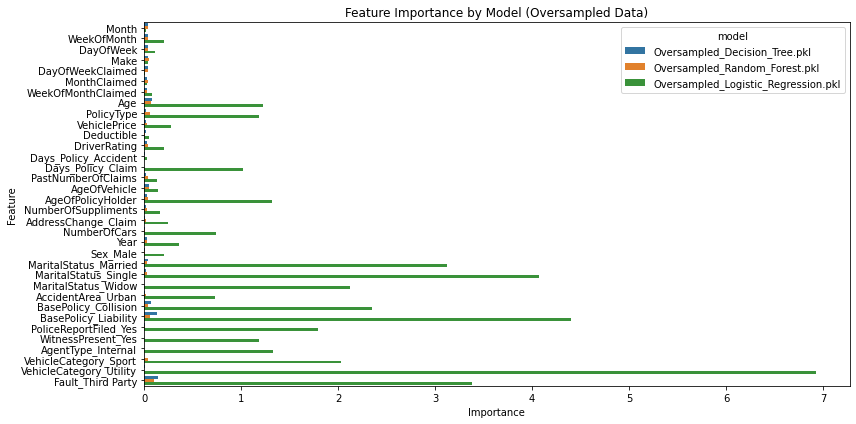

In [48]:
# main function to run the feature importance analysis.
def main():
    models_directory = "."  # Current directory, modify as needed

    try:
        feature_importance_df = extract_feature_importance(models_directory, X_train_over)
        if not feature_importance_df.empty:
            print("\nFeature Importances:")
            print(feature_importance_df)

            # Create visualization
            plot_feature_importance(feature_importance_df)
        else:
            print("No oversampled models with feature importance found.")
    except NameError:
        print("Please load your oversampled data (X_train_over) before running the analysis.")

if __name__ == "__main__":
    main()

# Ensemble Models
Ensemble models are used to improve prediction accuracy by combining multiple learners:
- Random Forest
- AdaBoost
- CatBoost
- XGBoost
- LightGBM

## Model Evaluation & SHAP Charts
We have included the feature importance analysis for vehicle insurance fraud detection as it provides key insights into the factors that contribute most significantly to identifying fraudulent claims. For both CatBoost and LightGBM models, we have genenerated interpretable SHAP plots along with respective SHAP values, highlighting several impactful features.

In [49]:
# import packages
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Other Boosting Libraries
import xgboost as xgb
import lightgbm as lgb
!pip install catboost
import catboost as cb

# Sklearn Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap

In [50]:
# generate SHAP plots for a given model
def generate_shap_plots(model, X_data, model_name):
    # Calculate SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)

    # Handle different SHAP value formats
    if isinstance(shap_values, list):
        # For binary classification, take class 1
        shap_values = shap_values[1]

    # Feature Importance Bar Plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        shap_values,
        X_data,
        plot_type="bar",
        show=False
    )
    plt.title(f'{model_name} SHAP Feature Importance')
    plt.tight_layout()
    plt.show()

    # Summary Dot Plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(
        shap_values,
        X_data,
        show=False
    )
    plt.title(f'{model_name} SHAP Summary Plot')
    plt.tight_layout()
    plt.show()

In [51]:
# model evaluation functioin for ensemble models
def evaluate_ensemble_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Print results header
    print(f"\nOversampled - {model_name}")
    print("=" * 40)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Oversampled - {model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

    print(f"\nAccuracy Score: {accuracy:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"Precision Score: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Generate SHAP plots for CatBoost and LightGBM
    if model_name in ['CatBoost', 'LightGBM']:
        print(f"\nGenerating SHAP plots for {model_name}")
        generate_shap_plots(model, X_train, model_name)

    return {
        'model': model_name,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'roc_auc_score': roc_auc
    }

In [52]:
# Run ensemble and boosting classifiers on oversampled training data
def run_ensemble_classifiers(X_train_over, y_train_over, X_test, y_test):
    # Initialize Ensemble Models
    models = [
        # Sklearn Ensemble Models
        (RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            max_depth=None
        ), "Random Forest"),

        (AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=50,
            random_state=42
        ), "AdaBoost"),

        # External Boosting Libraries
        (cb.CatBoostClassifier(
            iterations=100,
            random_seed=42,
            verbose=0
        ), "CatBoost"),

        (xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            random_state=42
        ), "XGBoost"),

        (lgb.LGBMClassifier(
            n_estimators=100,
            learning_rate=0.1,
            random_state=42
        ), "LightGBM")
    ]

    # Results storage
    all_results = []

    # Run each model
    for model, model_name in models:
        result = evaluate_ensemble_model(
            model,
            X_train_over, y_train_over,
            X_test, y_test,
            model_name
        )
        all_results.append(result)

    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results)

    # Display summary
    print("\nEnsemble Models Results Summary:")
    print(results_df)

    # Visualization of results
    plt.figure(figsize=(10, 6))
    results_df.set_index('model')[['accuracy', 'recall', 'precision', 'f1_score', 'roc_auc_score']].plot(kind='bar')
    plt.title("Model Performance Metrics")
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return results_df


Oversampled - Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2885
           1       0.22      0.13      0.16       199

    accuracy                           0.92      3084
   macro avg       0.58      0.55      0.56      3084
weighted avg       0.89      0.92      0.90      3084


Confusion Matrix:
[[2797   88]
 [ 174   25]]


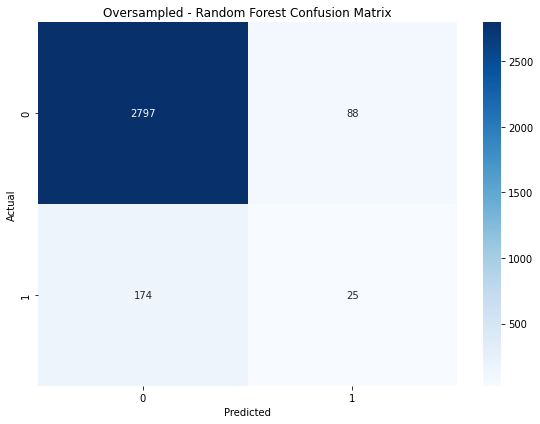


Accuracy Score: 0.9150
Recall Score: 0.1256
Precision Score: 0.2212
F1 Score: 0.1603
ROC AUC Score: 0.5476


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Oversampled - AdaBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2885
           1       0.19      0.33      0.24       199

    accuracy                           0.87      3084
   macro avg       0.57      0.62      0.58      3084
weighted avg       0.90      0.87      0.88      3084


Confusion Matrix:
[[2604  281]
 [ 133   66]]


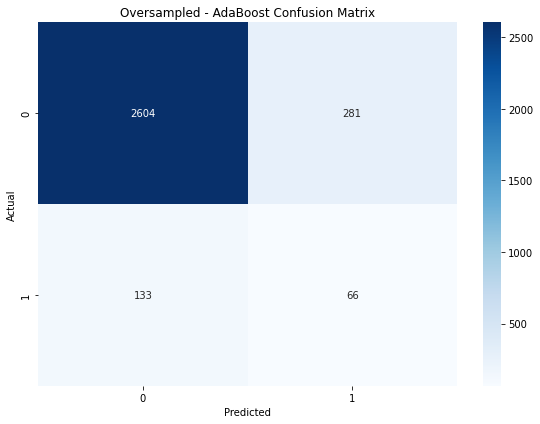


Accuracy Score: 0.8658
Recall Score: 0.3317
Precision Score: 0.1902
F1 Score: 0.2418
ROC AUC Score: 0.6171

Oversampled - CatBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2885
           1       0.24      0.13      0.16       199

    accuracy                           0.92      3084
   macro avg       0.59      0.55      0.56      3084
weighted avg       0.90      0.92      0.91      3084


Confusion Matrix:
[[2804   81]
 [ 174   25]]


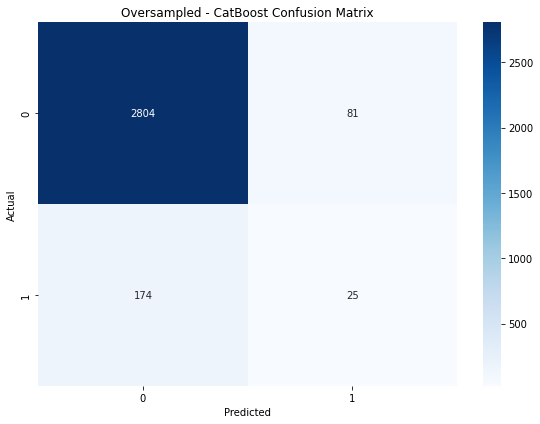


Accuracy Score: 0.9173
Recall Score: 0.1256
Precision Score: 0.2358
F1 Score: 0.1639
ROC AUC Score: 0.5488

Generating SHAP plots for CatBoost


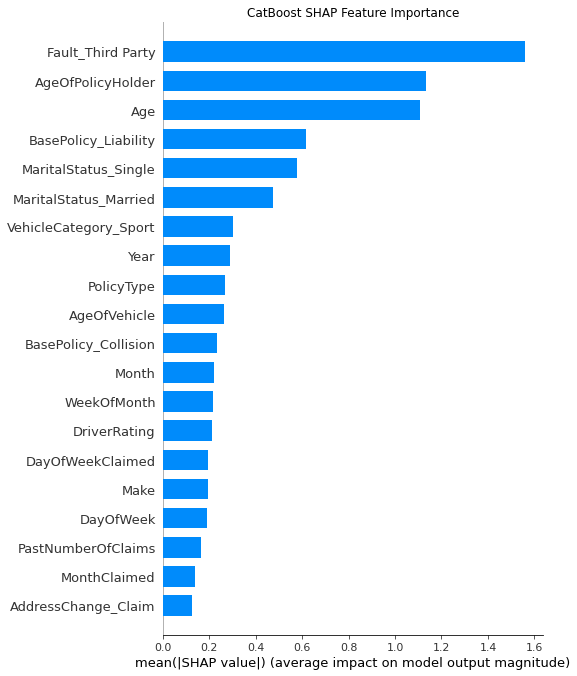

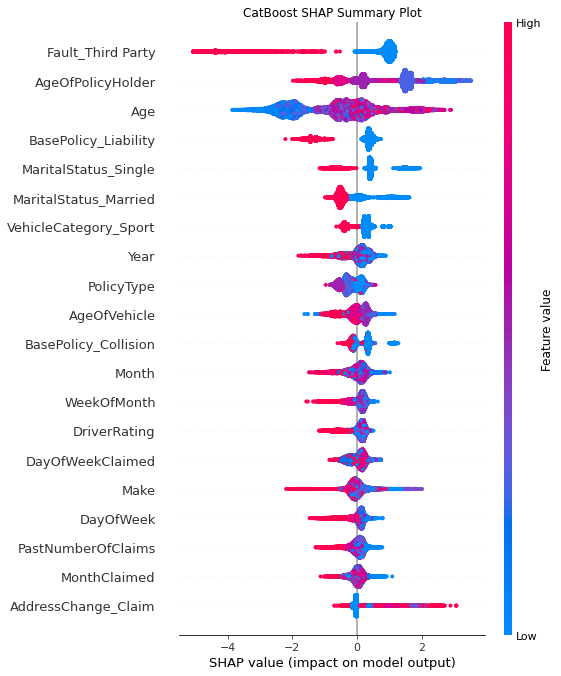


Oversampled - XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2885
           1       0.23      0.22      0.23       199

    accuracy                           0.90      3084
   macro avg       0.59      0.59      0.59      3084
weighted avg       0.90      0.90      0.90      3084


Confusion Matrix:
[[2741  144]
 [ 155   44]]


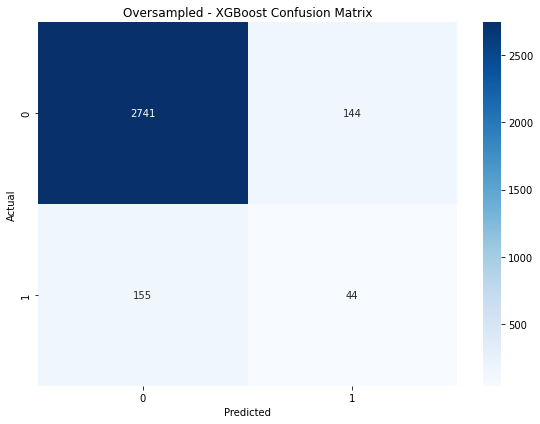


Accuracy Score: 0.9030
Recall Score: 0.2211
Precision Score: 0.2340
F1 Score: 0.2274
ROC AUC Score: 0.5856
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5805, number of negative: 11611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 17416, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333314 -> initscore=-0.693233
[LightGBM] [Info] Start training from score -0.693233

Oversampled - LightGBM

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2885
           1       0.26      0.14      0.18       199

    accuracy                           0.92 

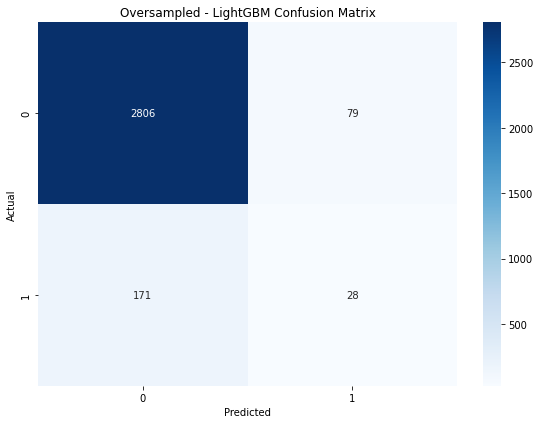


Accuracy Score: 0.9189
Recall Score: 0.1407
Precision Score: 0.2617
F1 Score: 0.1830
ROC AUC Score: 0.5567

Generating SHAP plots for LightGBM


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


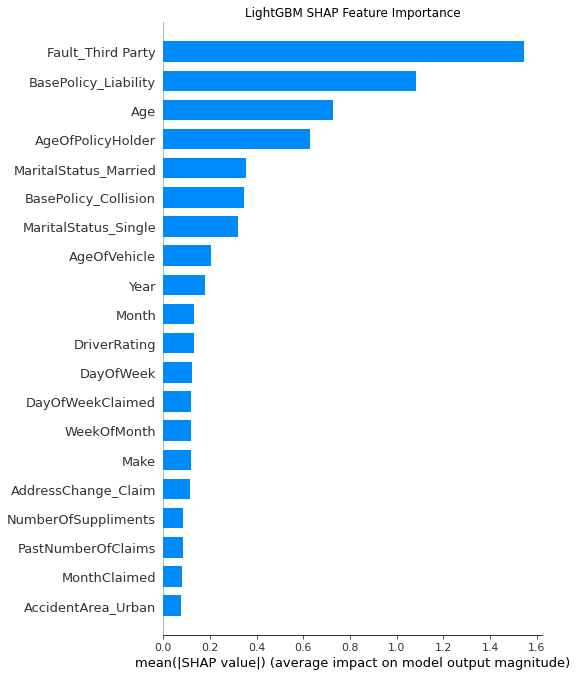

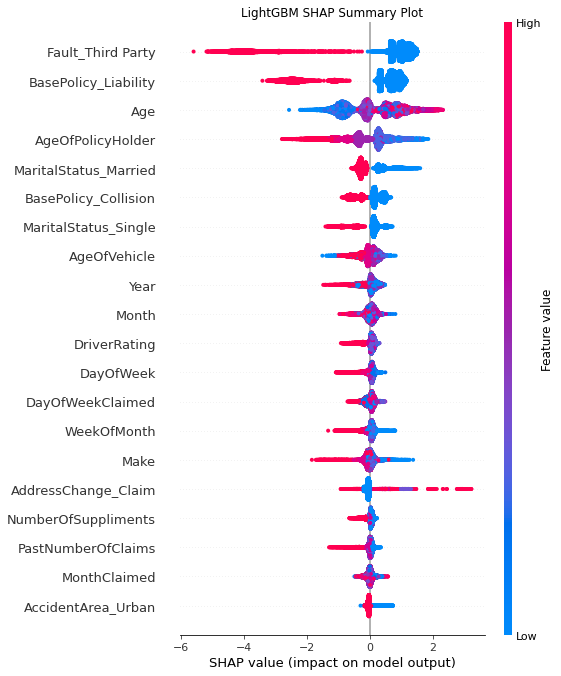


Ensemble Models Results Summary:
           model  accuracy    recall  precision  f1_score  roc_auc_score
0  Random Forest  0.915045  0.125628   0.221239  0.160256       0.547563
1       AdaBoost  0.865759  0.331658   0.190202  0.241758       0.617129
2       CatBoost  0.917315  0.125628   0.235849  0.163934       0.548776
3        XGBoost  0.903048  0.221106   0.234043  0.227390       0.585596
4       LightGBM  0.918936  0.140704   0.261682  0.183007       0.556660


<Figure size 720x432 with 0 Axes>

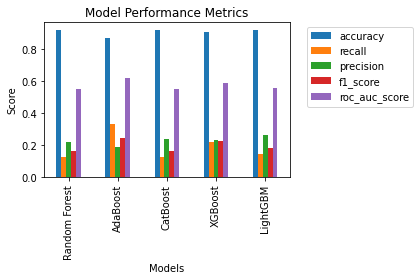

In [53]:
# model running & model evaluation
def main():
    # Run the evaluation
    results_df = run_ensemble_classifiers(
        X_train_over, y_train_over,
        X_test, y_test
    )

if __name__ == "__main__":
    main()

**Ensemble Models Results Summary:**

| Model          | Accuracy | Recall  | Precision | F1 Score | ROC AUC Score |
|----------------|----------|---------|-----------|----------|---------------|
| Random Forest  | 0.9150   | 0.1256  | 0.2212    | 0.1603   | 0.5476        |
| AdaBoost       | 0.8658   | 0.3317  | 0.1902    | 0.2418   | 0.6171        |
| CatBoost       | 0.9173   | 0.1256  | 0.2358    | 0.1639   | 0.5488        |
| XGBoost        | 0.9030   | 0.2211  | 0.2340    | 0.2274   | 0.5856        |
| LightGBM       | 0.9189   | 0.1407  | 0.2617    | 0.1830   | 0.5567        |


In [54]:
import pandas as pd

# Creating a DataFrame with the provided data
data = {
    'model': ['Random Forest', 'AdaBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'accuracy': [0.915045, 0.865759, 0.917315, 0.903048, 0.918936],
    'recall': [0.125628, 0.331658, 0.125628, 0.221106, 0.140704],
    'precision': [0.221239, 0.190202, 0.235849, 0.234043, 0.261682],
    'f1_score': [0.160256, 0.241758, 0.163934, 0.227390, 0.183007],
    'roc_auc_score': [0.547563, 0.617129, 0.548776, 0.585596, 0.556660]
}

df = pd.DataFrame(data)

# Calculating the average for each metric and creating a new DataFrame with results in rows
averages = df.mean(numeric_only=True).to_frame(name='ensemble_model_average').T

# Printing the transposed averages
print(averages)


                        accuracy    recall  precision  f1_score  roc_auc_score
ensemble_model_average  0.904021  0.188945   0.228603  0.195269       0.571145


# Advanced Models
To handle the complexity of the fraud detection task, we utilized advanced neural networks models:
- Sklearn Multi-Layer Perceptron
- Dense Neural Network
- Bidirectional LSTM
- 1D Convolutional Network
- Gated Recurrent Unit (GRU)
- Self-Attention Network
- Transformer-Inspired Model
- Residual Network
- Deep Belief Network

In [55]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (
    Reshape, Dense, Dropout, Bidirectional, LSTM, GRU, Flatten, Input,
    LayerNormalization, GlobalAveragePooling1D, Conv1D, MaxPooling1D,
    MultiHeadAttention
)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    recall_score, precision_score, f1_score, roc_auc_score
)
from sklearn.neural_network import MLPClassifier

In [56]:
# dense neural network
def create_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [57]:
# bidirectional LSTM network
def create_bidirectional_lstm_model(input_shape, num_classes):
    model = Sequential([
        Reshape((1, input_shape[0]), input_shape=input_shape),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [58]:
# 1D CNN
def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential([
        Reshape((input_shape[0], 1), input_shape=input_shape),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(32, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [59]:
# GRU network
def create_gru_model(input_shape, num_classes):
    model = Sequential([
        Reshape((1, input_shape[0]), input_shape=input_shape),
        Bidirectional(GRU(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(GRU(32)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [60]:
# self attention network
def create_self_attention_model(input_shape, num_classes):
    inputs = Input(shape=(input_shape[0], 1))
    x = Dense(64, activation='relu')(inputs)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = LayerNormalization()(attention_output + x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [61]:
# transformer inspired model
def create_transformer_model(input_shape, num_classes):
    inputs = Input(shape=(input_shape[0], 1))
    x = Dense(64, activation='relu')(inputs)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = LayerNormalization()(x + attention_output)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [62]:
# residual network
def create_residual_network_model(input_shape, num_classes):
    def residual_block(x, filters, downsample=False):
        shortcut = x
        x = Dense(filters, activation='relu')(x)
        x = Dropout(0.3)(x)
        x = Dense(filters)(x)
        if downsample:
            shortcut = Dense(filters)(shortcut)
        x = LayerNormalization()(x + shortcut)
        return x

    inputs = Input(shape=input_shape)
    x = Dense(64, activation='relu')(inputs)
    x = residual_block(x, 64)
    x = residual_block(x, 32, downsample=True)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [63]:
# Create neural network architectures
def create_neural_network_models(input_shape, num_classes):
    models = [
        (MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
         "Sklearn MLP"),
        (create_dense_model(input_shape, num_classes),
         "Dense Network"),
        (create_bidirectional_lstm_model(input_shape, num_classes),
         "Bidirectional LSTM"),
        (create_1d_cnn_model(input_shape, num_classes),
         "1D CNN"),
        (create_gru_model(input_shape, num_classes),
         "GRU Network"),
        (create_self_attention_model(input_shape, num_classes),
         "Self-Attention Network"),
        (create_transformer_model(input_shape, num_classes),
         "Transformer-Inspired"),
        (create_residual_network_model(input_shape, num_classes),
         "Residual Network")
    ]
    return models

In [64]:
# model evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, is_keras_model=False):
    # Evaluate a single model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if is_keras_model:
        y_train_encoded = to_categorical(y_train)
        y_test_encoded = to_categorical(y_test)

        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        history = model.fit(
            X_train_scaled, y_train_encoded,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )

        y_pred = model.predict(X_test_scaled)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test_encoded, axis=1)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_classes = model.predict(X_test_scaled)
        y_test_classes = y_test

    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    roc_auc = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr', average='weighted')

    # Print results
    print(f"\nModel: {model_name}")
    print("=" * 40)
    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'roc_auc_score': roc_auc
    }

In [65]:
# evaluation for all models
def run_neural_network_evaluation(X_train, y_train, X_test, y_test):
    num_classes = len(np.unique(y_test))
    input_shape = (X_train.shape[1],)
    models = create_neural_network_models(input_shape, num_classes)

    results = []
    for model, model_name in models:
        is_keras_model = isinstance(model, (Sequential, Model))
        result = evaluate_model(
            model, X_train, y_train,
            X_test, y_test,
            model_name, is_keras_model
        )
        results.append(result)

    # Create summary DataFrame
    results_df = pd.DataFrame(results)
    print("\nNeural Network Models Results Summary:")
    print(results_df)

    # Plot results
    plt.figure(figsize=(12, 6))
    results_df.set_index('model')[['accuracy', 'f1_score', 'roc_auc_score']].plot(kind='bar')
    plt.title("Model Performance Metrics")
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return results_df


Model: Sklearn MLP

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2885
           1       0.19      0.21      0.20       199

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.57      3084
weighted avg       0.90      0.89      0.89      3084



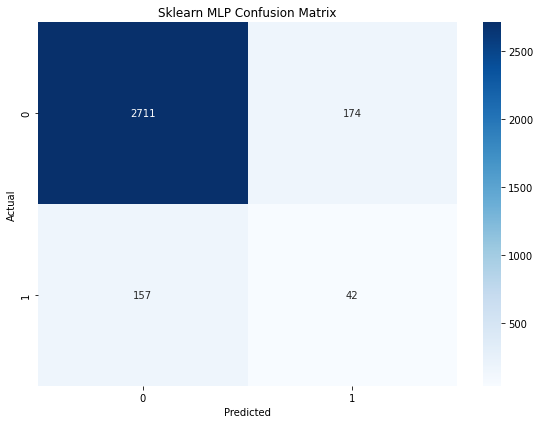

97/97 [==============================] - 0s 326us/step

Model: Dense Network

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2885
           1       0.23      0.11      0.15       199

    accuracy                           0.92      3084
   macro avg       0.58      0.54      0.55      3084
weighted avg       0.89      0.92      0.90      3084



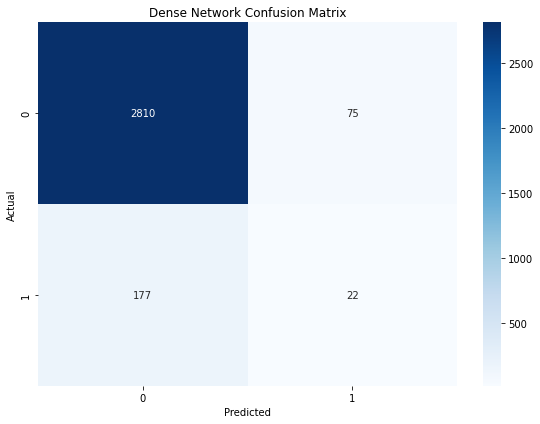

97/97 [==============================] - 1s 754us/step

Model: Bidirectional LSTM

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2885
           1       0.25      0.21      0.23       199

    accuracy                           0.91      3084
   macro avg       0.60      0.58      0.59      3084
weighted avg       0.90      0.91      0.90      3084



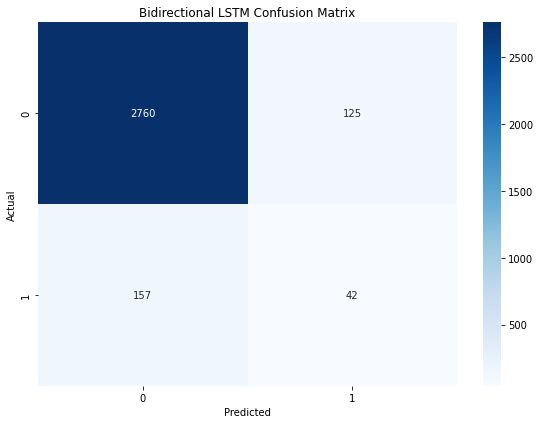

97/97 [==============================] - 0s 754us/step

Model: 1D CNN

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2885
           1       0.21      0.19      0.20       199

    accuracy                           0.90      3084
   macro avg       0.58      0.57      0.57      3084
weighted avg       0.90      0.90      0.90      3084



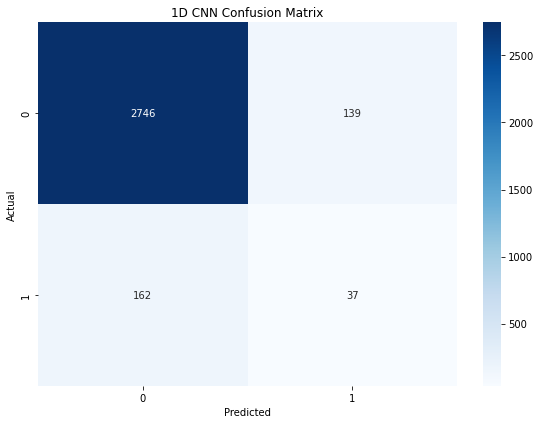

In [ ]:
results_df = run_neural_network_evaluation(
    X_train_over,
    y_train_over,
    X_test,
    y_test
)
results_df

**Neural Network Models Results Summary:**

| Model                  | Accuracy | Recall  | Precision | F1 Score | ROC AUC Score |
|------------------------|----------|---------|-----------|----------|---------------|
| Sklearn MLP            | 0.8927   | 0.8927  | 0.8968    | 0.8947   | 0.5754        |
| Dense Network          | 0.9183   | 0.9183  | 0.8947    | 0.9049   | 0.5423        |
| Bidirectional LSTM     | 0.9086   | 0.9086  | 0.9014    | 0.9048   | 0.5839        |
| 1D CNN                 | 0.9024   | 0.9024  | 0.8969    | 0.8996   | 0.5689        |
| GRU Network            | 0.8920   | 0.8920  | 0.8933    | 0.8926   | 0.5587        |
| Self-Attention Network | 0.9073   | 0.9073  | 0.8932    | 0.8998   | 0.5481        |
| Transformer-Inspired   | 0.9066   | 0.9066  | 0.8935    | 0.8997   | 0.5501        |
| Residual Network       | 0.8911   | 0.8911  | 0.8964    | 0.8937   | 0.5745        |


### Compare performance of different model categories

In [ ]:
import pandas as pd

# Creating a DataFrame with the provided data
data = {
    'model': [
        'Sklearn MLP', 'Dense Network', 'Bidirectional LSTM', '1D CNN',
        'GRU Network', 'Self-Attention Network', 'Transformer-Inspired', 'Residual Network'
    ],
    'accuracy': [0.8927, 0.9183, 0.9086, 0.9024, 0.8920, 0.9073, 0.9066, 0.8911],
    'recall': [0.8927, 0.9183, 0.9086, 0.9024, 0.8920, 0.9073, 0.9066, 0.8911],
    'precision': [0.8968, 0.8947, 0.9014, 0.8969, 0.8933, 0.8932, 0.8935, 0.8964],
    'f1_score': [0.8947, 0.9049, 0.9048, 0.8996, 0.8926, 0.8998, 0.8997, 0.8937],
    'roc_auc_score': [0.5754, 0.5423, 0.5839, 0.5689, 0.5587, 0.5481, 0.5501, 0.5745]
}

df = pd.DataFrame(data)

# Calculating the average for each metric and creating a new DataFrame with results in rows
averages = df.mean(numeric_only=True).to_frame(name='advanced_model_average').T

# Formatting the values to four decimal places
averages = averages.round(4)

# Printing the formatted averages
averages


,accuracy,recall,precision,f1_score,roc_auc_score
advanced_model_average,0.9024,0.9024,0.8958,0.8987,0.5627




| Model                     | Accuracy | Recall  | Precision | F1 Score | ROC AUC Score |
|---------------------------|----------|---------|-----------|----------|---------------|
| Traditional Model Average | 0.8159   | 0.3709  | 0.1575    | 0.2045   | 0.6087        |
| Ensemble Model Average    | 0.9040   | 0.1889  | 0.2286    | 0.1953   | 0.5711        |
| Advanced Model Average    | 0.9024   | 0.9024  | 0.8958    | 0.8987   | 0.5627        |

